# Canonical Quantization of Cylindrical Gravitational Waves by Karl Kuchar
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 21, 2022

https://journals.aps.org/prd/abstract/10.1103/PhysRevD.4.955

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
#  Capital R is for Ricci so we use lower case r here.... 
T,r,phi,z,dT,dr,dphi,dz = symbols('T r phi z dT dr dphi dz')

In [4]:
Gamma = Function('Gamma')(T,r)
Gamma

In [5]:
psi = Function('psi')(T,r)
psi

In [6]:
variables = Matrix([T,r,phi,z])
variables

⎡T⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [7]:
differentials = Matrix([dT,dr,dphi,dz])
differentials 

⎡ dT ⎤
⎢    ⎥
⎢ dr ⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [8]:
lineElement = expand( exp(Gamma-psi) * (-dT**2 + dr**2) + r**2 * exp(-psi) * dphi**2 + exp(psi)*dz**2 ) 
lineElement

In [9]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  Γ(T, r)  -ψ(T, r)                                            ⎤
⎢-ℯ       ⋅ℯ                  0                0           0    ⎥
⎢                                                               ⎥
⎢                      Γ(T, r)  -ψ(T, r)                        ⎥
⎢         0           ℯ       ⋅ℯ               0           0    ⎥
⎢                                                               ⎥
⎢                                          2  -ψ(T, r)          ⎥
⎢         0                   0           r ⋅ℯ             0    ⎥
⎢                                                               ⎥
⎢                                                        ψ(T, r)⎥
⎣         0                   0                0        ℯ       ⎦

In [10]:
import sympy

In [11]:
m = sympy.Array(g)
m

⎡  Γ(T, r)  -ψ(T, r)                                            ⎤
⎢-ℯ       ⋅ℯ                  0                0           0    ⎥
⎢                                                               ⎥
⎢                      Γ(T, r)  -ψ(T, r)                        ⎥
⎢         0           ℯ       ⋅ℯ               0           0    ⎥
⎢                                                               ⎥
⎢                                          2  -ψ(T, r)          ⎥
⎢         0                   0           r ⋅ℯ             0    ⎥
⎢                                                               ⎥
⎢                                                        ψ(T, r)⎥
⎣         0                   0                0        ℯ       ⎦

In [12]:
from einsteinpy.symbolic import *

In [13]:
syms = sympy.symbols("T r phi z")
T,r,phi,z = syms

In [14]:
metric = MetricTensor(m,syms)

In [15]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡∂             ∂            ∂             ∂                                                                         ⎤  ⎡∂             
⎢⎢──(Γ(T, r))   ──(ψ(T, r))  ──(Γ(T, r))   ──(ψ(T, r))                                                               ⎥  ⎢──(Γ(T, r))   
⎢⎢∂T            ∂T           ∂r            ∂r                                                                        ⎥  ⎢∂r            
⎢⎢─────────── - ───────────  ─────────── - ───────────              0                               0                ⎥  ⎢─────────── - 
⎢⎢     2             2            2             2                                                                    ⎥  ⎢     2        
⎢⎢                                                                                                                   ⎥  ⎢              
⎢⎢∂             ∂            ∂             ∂                                                                         ⎥  ⎢∂             
⎢⎢──(Γ(T, r))   ──(ψ(T, r))  ──(Γ(T, r))   ──(ψ(

In [16]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡      2                2                           2       2                2                                                         
⎢     ∂                ∂               ⎛∂          ⎞       ∂                ∂             ∂             ∂                              
⎢- r⋅───(Γ(T, r)) + r⋅───(Γ(T, r)) - r⋅⎜──(ψ(T, r))⎟  + r⋅───(ψ(T, r)) - r⋅───(ψ(T, r)) + ──(Γ(T, r)) - ──(ψ(T, r))                    
⎢      2                2              ⎝∂T         ⎠        2                2            ∂r            ∂r                             
⎢    ∂T               ∂r                                  ∂T               ∂r                                                          
⎢──────────────────────────────────────────────────────────────────────────────────────────────────────────────────                    
⎢                                                       2⋅r                                                                            
⎢                                               

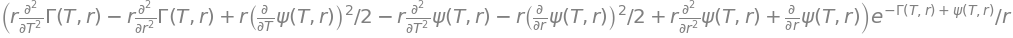

In [17]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [18]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                                                         ⎛            
⎢                                                                                                                         ⎜            
⎢      2                2                           2       2                2                                            ⎜    2       
⎢     ∂                ∂               ⎛∂          ⎞       ∂                ∂             ∂             ∂                 ⎜   ∂        
⎢- r⋅───(Γ(T, r)) + r⋅───(Γ(T, r)) - r⋅⎜──(ψ(T, r))⎟  + r⋅───(ψ(T, r)) - r⋅───(ψ(T, r)) + ──(Γ(T, r)) - ──(ψ(T, r))   0.5⋅⎜r⋅───(Γ(T, r
⎢      2                2              ⎝∂T         ⎠        2                2            ∂r            ∂r                ⎜    2       
⎢    ∂T               ∂r                                  ∂T               ∂r                                             ⎝  ∂T        
⎢───────────────────────────────────────────────

In [19]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [20]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [21]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡      2                2                           2       2                2                                                         
⎢     ∂                ∂               ⎛∂          ⎞       ∂                ∂             ∂             ∂                              
⎢- r⋅───(Γ(T, r)) + r⋅───(Γ(T, r)) - r⋅⎜──(ψ(T, r))⎟  + r⋅───(ψ(T, r)) - r⋅───(ψ(T, r)) + ──(Γ(T, r)) - ──(ψ(T, r))                    
⎢      2                2              ⎝∂T         ⎠        2                2            ∂r            ∂r                             
⎢    ∂T               ∂r                                  ∂T               ∂r                                                          
⎢──────────────────────────────────────────────────────────────────────────────────────────────────────────────────                    
⎢                                                       2⋅r                                                                            
⎢                                               

In [22]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                              ∂                          ∂           ∂             ∂                                  
⎢                    2                     2   ──(Γ(T, r))            - r⋅──(ψ(T, r))⋅──(ψ(T, r)) + ──(Γ(T, r))                        
⎢       ⎛∂          ⎞         ⎛∂          ⎞    ∂r                         ∂T          ∂r            ∂T                                 
⎢- 0.25⋅⎜──(ψ(T, r))⎟  - 0.25⋅⎜──(ψ(T, r))⎟  + ───────────            ─────────────────────────────────────────                        
⎢       ⎝∂T         ⎠         ⎝∂r         ⎠        2⋅r                                   2⋅r                                           
⎢                                                                                                                                      
⎢            ∂           ∂             ∂                                                                      ∂                        
⎢        - r⋅──(ψ(T, r))⋅──(ψ(T, r)) + ──(Γ(T, r

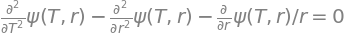

In [39]:
equation17 = Eq(expand((-1/r)*ricciSimplified[2,2].args[2]),0)
equation17

In [28]:
equation18 = Eq(diff(Gamma,r) , solve( einsteinSimplified[0,0], diff(Gamma,r) )[0] ) 
equation18

In [25]:
equation19 = Eq(diff(Gamma,T),solve( ricciSimplified[1,0], diff(Gamma,T))[0])
equation19

In [40]:
vacuumFieldEquations = Matrix([equation17,equation19,equation19])
vacuumFieldEquations

⎡                              ∂              ⎤
⎢  2              2            ──(ψ(T, r))    ⎥
⎢ ∂              ∂             ∂r             ⎥
⎢───(ψ(T, r)) - ───(ψ(T, r)) - ─────────── = 0⎥
⎢  2              2                 r         ⎥
⎢∂T             ∂r                            ⎥
⎢                                             ⎥
⎢   ∂               ∂           ∂             ⎥
⎢   ──(Γ(T, r)) = r⋅──(ψ(T, r))⋅──(ψ(T, r))   ⎥
⎢   ∂T              ∂T          ∂r            ⎥
⎢                                             ⎥
⎢   ∂               ∂           ∂             ⎥
⎢   ──(Γ(T, r)) = r⋅──(ψ(T, r))⋅──(ψ(T, r))   ⎥
⎣   ∂T              ∂T          ∂r            ⎦

In [36]:
from sympy import Function, Eq, pde_separate_mul, Derivative as D

In [37]:
u, X, Y = map(Function, 'uXY')

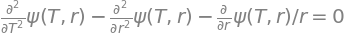

In [41]:
eq = vacuumFieldEquations[0]
eq

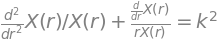

In [52]:
xODE = Eq(pde_separate( eq, psi, [X(r),Y(T)])[0] , k**2 ) 
xODE

In [46]:
from sympy import dsolve 

In [53]:
xSolution = dsolve( xODE , X(r))
xSolution 

In [54]:
xSolutionParticular = xSolution.subs(xSolution.args[1].args[0].args[0],1).subs(xSolution.args[1].args[1].args[0],1)
xSolutionParticular

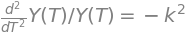

In [55]:
yODE = Eq( pde_separate( eq, psi, [X(r),Y(T)])[1] ,  -k**2 ) 
yODE

In [56]:
ySolution = dsolve( yODE , Y(T))
ySolution 

In [57]:
ySolutionParticular = ySolution.subs(ySolution.args[1].args[0].args[0],1).subs(ySolution.args[1].args[1].args[0],1)
ySolutionParticular

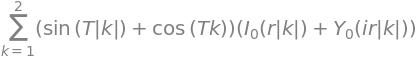

In [58]:
#  Here we arbitrary pick just two terms as an example... 
Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,2) )